In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay, roc_curve, confusion_matrix, classification_report, mean_squared_error, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from datetime import timedelta
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV #GridSearch is for hyperparameter tuning
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [4]:
data=pd.read_csv('C:\\Users\\etiem\\Downloads\\train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
data['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [12]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [6]:
# Checking for more nulls
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Filling null values with mean
data['Age'].fillna(df['Age'].mean(), inplace=True)
# Filling Cabin Null values with mode
data['Cabin'].fillna(df['Cabin'].mode(), inplace=True)

C:\Users\etiem\AppData\Local\Temp\ipykernel_14568\3548155591.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\etiem\AppData\Local\Temp\ipykernel_14568\3548155591.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [13]:
# Checking for more nulls
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         2
dtype: int64

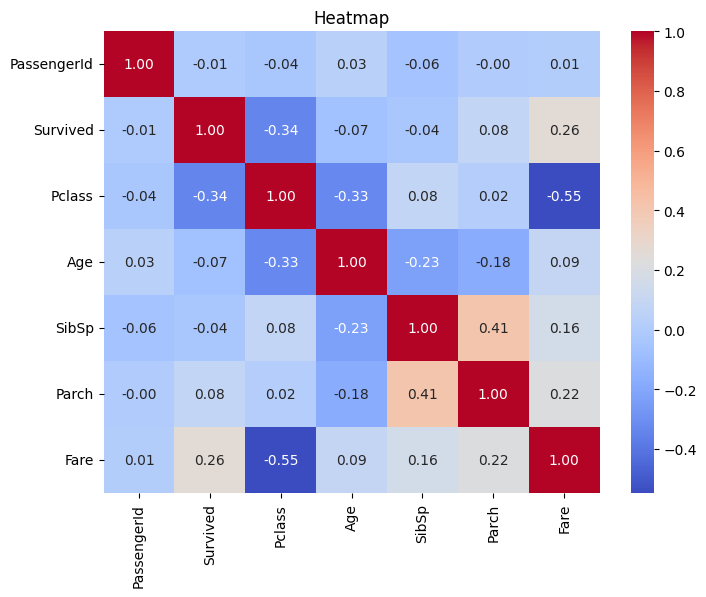

In [8]:
# Select only the numerical columns for correlation analysis
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Generate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap")
plt.show()

In [14]:
train, test = train_test_split(data, test_size=0.3, random_state=1234)

In [15]:
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.000000,0,1,111361,57.9792,B18,C
778,779,0,3,"Kilgannon, Mr. Thomas J",male,29.699118,0,0,36865,7.7375,NaN,Q
760,761,0,3,"Garfirth, Mr. John",male,29.699118,0,0,358585,14.5000,NaN,S
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.000000,1,0,36947,78.2667,D20,C
583,584,0,1,"Ross, Mr. John Hugo",male,36.000000,0,0,13049,40.1250,A10,C
...,...,...,...,...,...,...,...,...,...,...,...,...
728,729,0,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25.000000,1,0,236853,26.0000,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,29.699118,0,0,239855,0.0000,NaN,S
669,670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,29.699118,1,0,19996,52.0000,C126,S
656,657,0,3,"Radeff, Mr. Alexander",male,29.699118,0,0,349223,7.8958,NaN,S


In [ ]:
data['Age'] = data['Age'].astype(str)


In [16]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
features = ['Pclass', 'Sex', 'Age', 'Parch', 'SibSp','Fare', 'Cabin']
target = 'Survived'

In [ ]:
data['Sex']

In [21]:
# Define features and target
numFeatures = ['Pclass', 'Sex', 'Age', 'Parch', 'SibSp','Fare', 'Cabin']
target = 'Survived'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[numFeatures], data[target], test_size=0.3, random_state=42)

# Build transformers for the pipeline
catTransformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
numTransformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Build preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numTransformer, numFeatures)
])

In [22]:
rf = Pipeline(steps= [('preprocessor', preprocessor), ('rf', RandomForestClassifier(n_estimators=100, random_state=100))])

rf.fit(X_train, y_train)
rf.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision:", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1 Score:", f1)

# cross validation
crossVal = cross_val_score(rf, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

ValueError: could not convert string to float: 'male'